<a href="https://colab.research.google.com/github/diegovasconcelo/AI_robotics_seminar-TP1/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Work #1

## Statement of the Activity
The owner of a shopping mall, for their strategic marketing planning, needs to segment and analyze consumer behavior. For this purpose, a database is available that contains information on age, gender, annual income, and spending score (a score assigned based on the propensity to spend; the higher the score, the more willing the consumer is to buy. This score ranges from 1 to 99).

---
[Kaggle (s.f.). Mall Customer Segmentation Data.](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download)

## Prepare the environment


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Exploration

In [6]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Gender

In [9]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


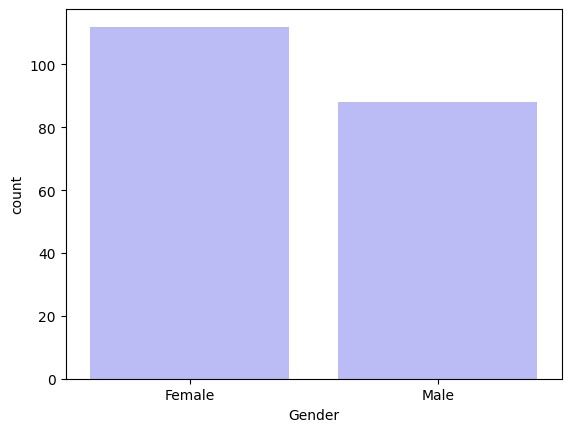

In [ ]:
sns.barplot(x=df['Gender'].value_counts().index, y=df['Gender'].value_counts(), color='blue', alpha=0.3)
plt.show()

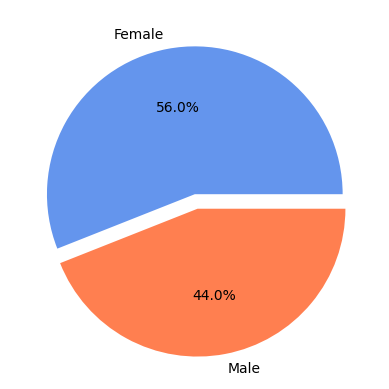

In [ ]:
explode =[0,0.1]
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%',colors=['cornflowerblue','coral'],explode=explode)
plt.show()

### Age

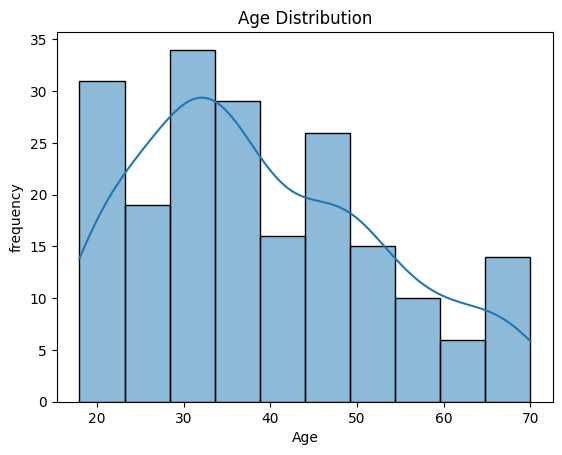

In [ ]:
# Age distribution (Histogram)
sns.histplot(df['Age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age Distribution')
plt.show()

### Age and Gender

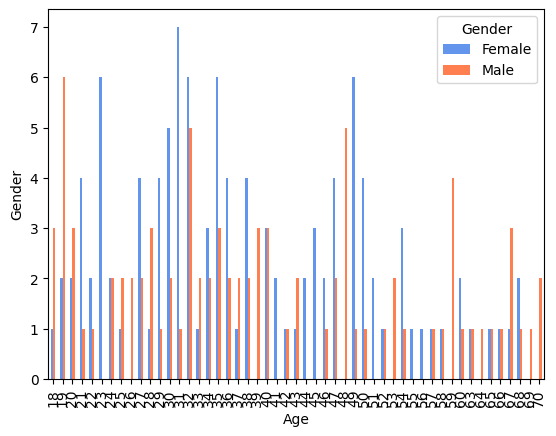

In [ ]:
pd.crosstab(df['Age'],df['Gender']).plot(kind='bar',color=['cornflowerblue','coral'])
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

### Annual Income and Gender

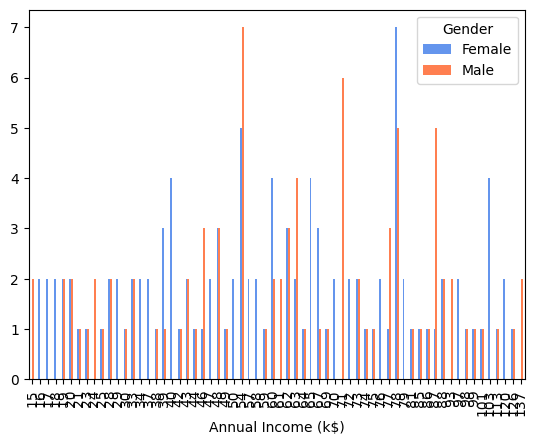

In [ ]:
pd.crosstab(df['Annual Income (k$)'],df['Gender']).plot(kind='bar', color=['cornflowerblue','coral'])
plt.show()

In [ ]:
pd.crosstab(df['Age'],df['Annual Income (k$)'])

Annual Income (k$),15,16,17,18,19,20,21,23,24,25,...,93,97,98,99,101,103,113,120,126,137
Age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Annual income

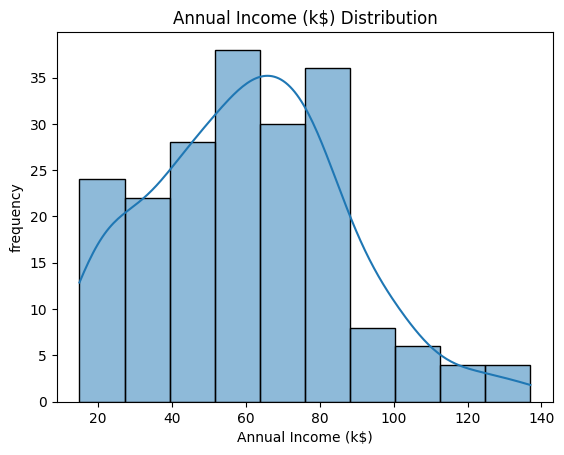

In [ ]:
# Annual Income distribution (Histogram)
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
plt.xlabel('Annual Income (k$)')
plt.ylabel('frequency')
plt.title('Annual Income (k$) Distribution')
plt.show()

### Spending score

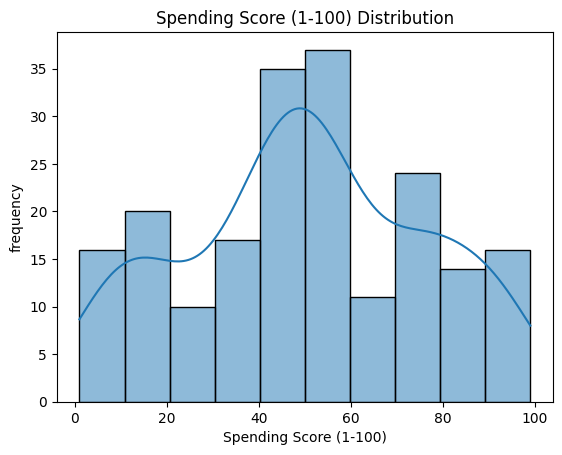

In [ ]:
# Spending Score (1-100) Distribution (Histogram)
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('frequency')
plt.title('Spending Score (1-100) Distribution')
plt.show()

## Application of the k-means algorithm

### Annual Income (k$) vs Spending Score (1-100)

#### 1st. Creating a Scatter Plot

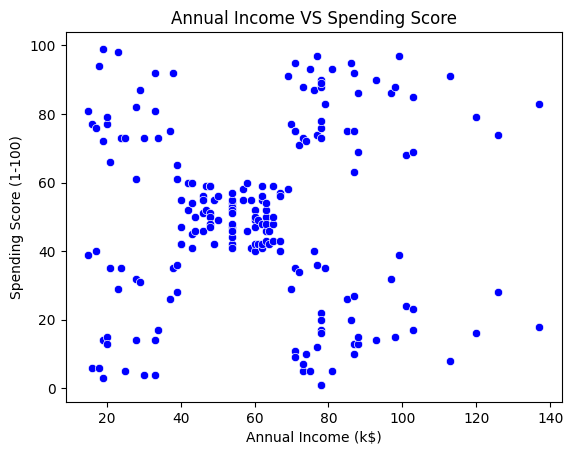

In [11]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color='blue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income VS Spending Score')
plt.show()

#### 2nd Preprocessing.

Scaling features for K-Means

In [13]:
# Columns for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### 3rd Determining the Optimal Number of Clusters Using the **Elbow Method**

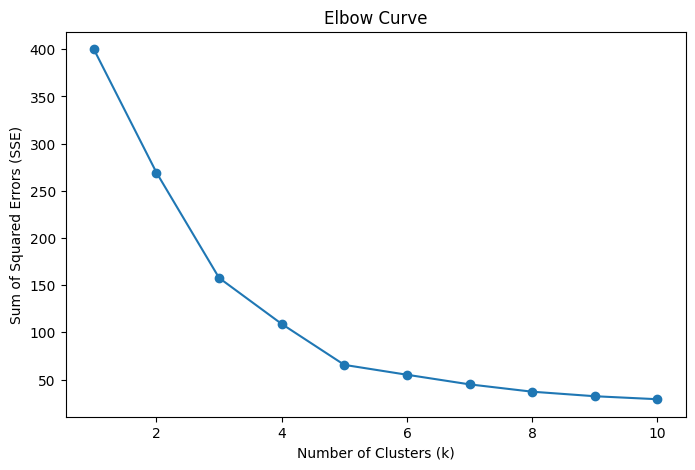

In [17]:
sse = []  # list of Sum of Squared Errors

# cluster to test
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Elbow Curve tracing
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()

#### 4th Applying K-Means with the optimal number of cluster `k`

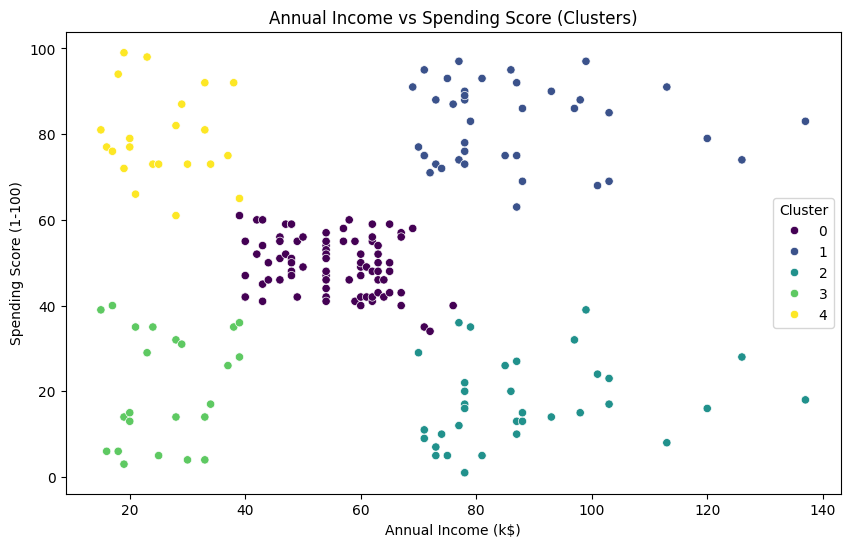

In [20]:
# Based on the graph
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
kmeans.fit(scaled_features)

# Labels of the clusters
df['Cluster'] = kmeans.labels_

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=df)

# tags and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score (Clusters)')
plt.legend(title='Cluster')
plt.show()

### Age vs Spending Score (1-100)

#### 1st. Creating a Scatter Plot

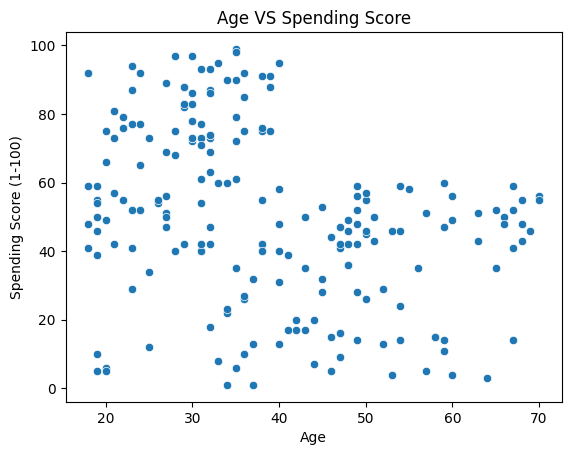

In [21]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age VS Spending Score')
plt.show()

#### 2nd Preprocessing.

Scaling features for K-Means

In [22]:
# Columns for clustering
features = df[['Age', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### 3rd Determining the Optimal Number of Clusters Using the **Elbow Method**

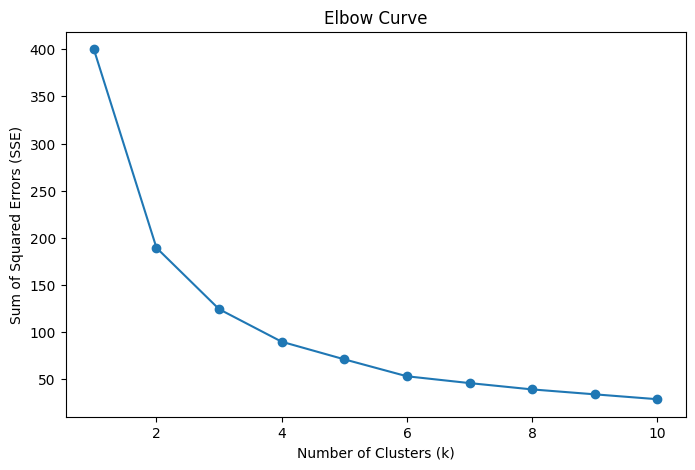

In [23]:
sse = []  # list of Sum of Squared Errors

# cluster to test
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Elbow Curve tracing
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()

#### 4th Applying K-Means with the optimal number of cluster `k`

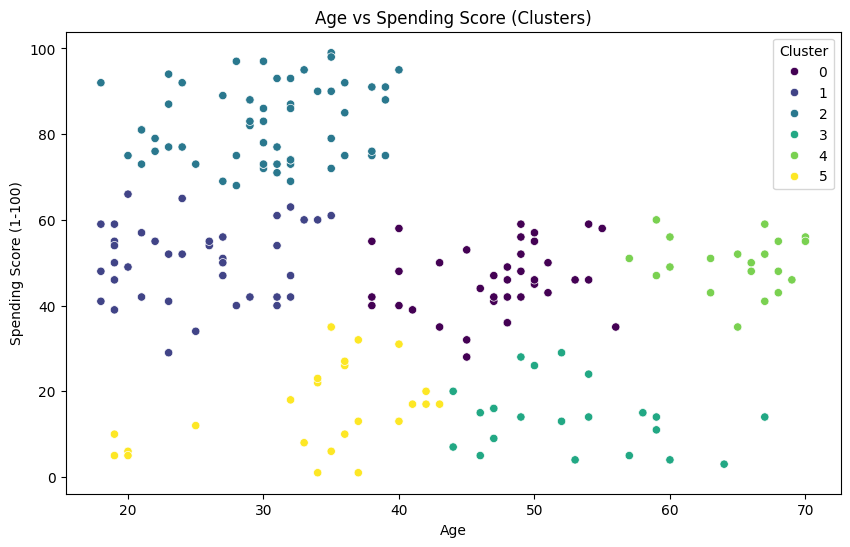

In [26]:
# Based on the graph
optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
kmeans.fit(scaled_features)

# Labels of the clusters
df['Cluster'] = kmeans.labels_

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=df)

# tags and title
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score (Clusters)')
plt.legend(title='Cluster')
plt.show()

### Age vs Annual Income (k$)

#### 1st. Creating a Scatter Plot

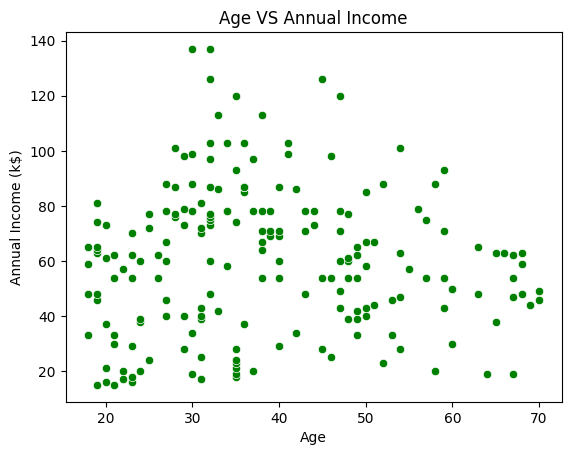

In [31]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, color='green')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age VS Annual Income')
plt.show()

#### 2nd Preprocessing.

Scaling features for K-Means

In [32]:
# Columns for clustering
features = df[['Age', 'Annual Income (k$)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### 3rd Determining the Optimal Number of Clusters Using the **Elbow Method**

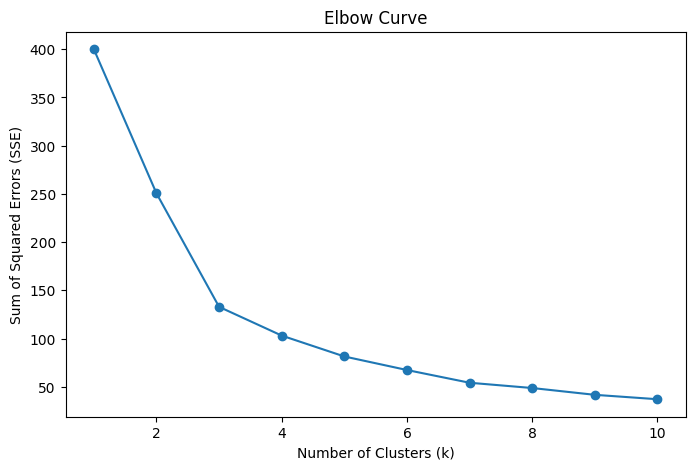

In [33]:
sse = []  # list of Sum of Squared Errors

# cluster to test
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Elbow Curve tracing
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()

#### 4th Applying K-Means with the optimal number of cluster `k`

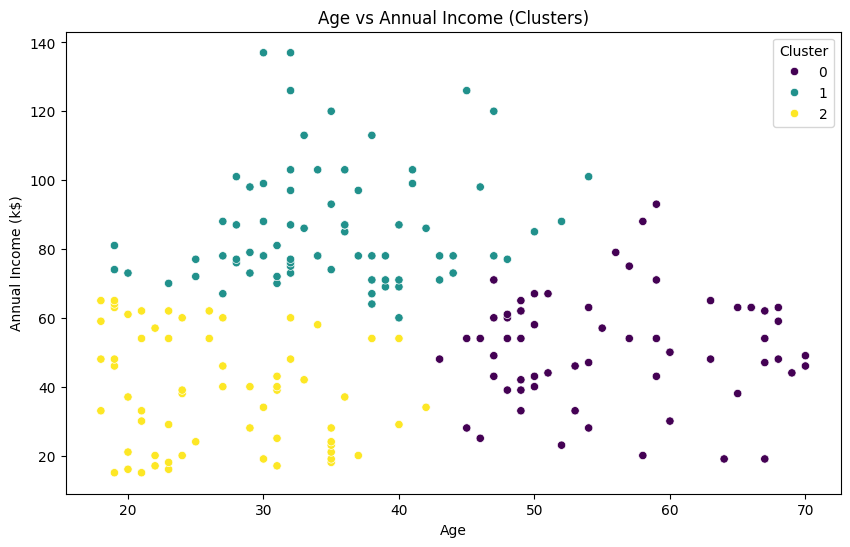

In [36]:
# Based on the graph
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
kmeans.fit(scaled_features)

# Labels of the clusters
df['Cluster'] = kmeans.labels_

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', palette='viridis', data=df)

# tags and title
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income (Clusters)')
plt.legend(title='Cluster')
plt.show()